 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data_path = Path('../Starter_Code/Resources/whale_returns.csv')
whale_data = pd.read_csv(whale_data_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale_data.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_data = whale_data.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data_path = Path('../Starter_Code/Resources/algo_returns.csv')
algo_data = pd.read_csv(algo_data_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_data.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_data = algo_data.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data_path = Path('../Starter_Code/Resources/sp500_history.csv')
sp500_data = pd.read_csv(sp500_data_path,index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_data['Close'].dtype

#sp500_data['Date'].to_datetime()

 #sp500_data['Close'].astype('float')


dtype('O')

In [10]:
# Fix Data Types
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].astype('float')


C:\Users\edelb\AppData\Local\Temp/ipykernel_18900/1864015330.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")


In [11]:
sp500_data

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [12]:
# Calculate Daily Returns and drop nulls 
sp500_Daily_Return = sp500_data.pct_change().dropna()
sp500_Daily_Return

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Drop nulls
sp500_Daily_Return.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_Daily_Return = sp500_Daily_Return.rename(columns={
    "Close": "SP"
})
sp500_Daily_Return.head()

,SP
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_data, algo_data, sp500_Daily_Return], axis="columns", join="inner")
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

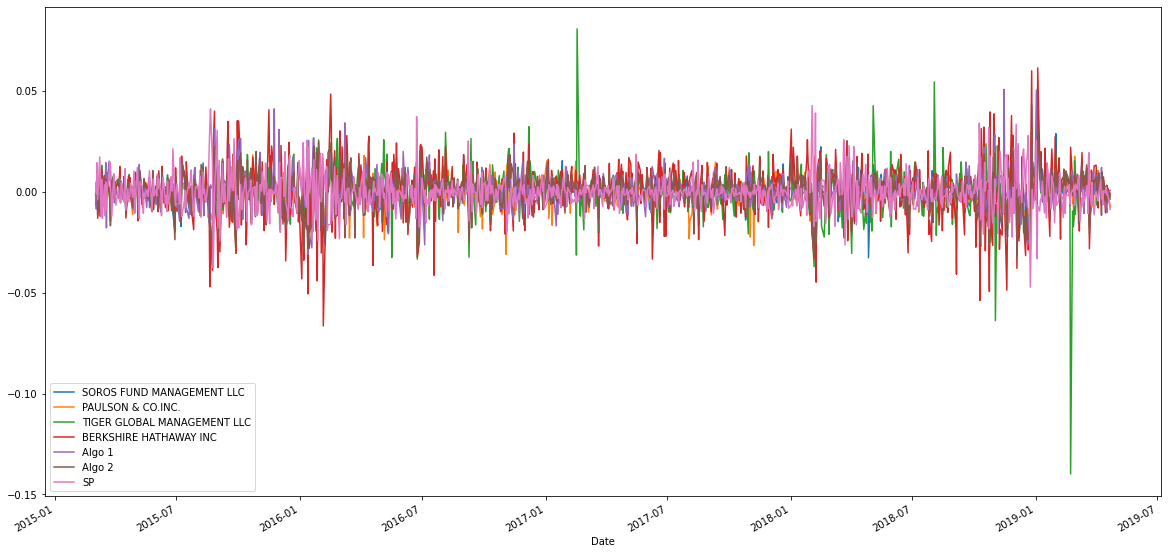

In [16]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

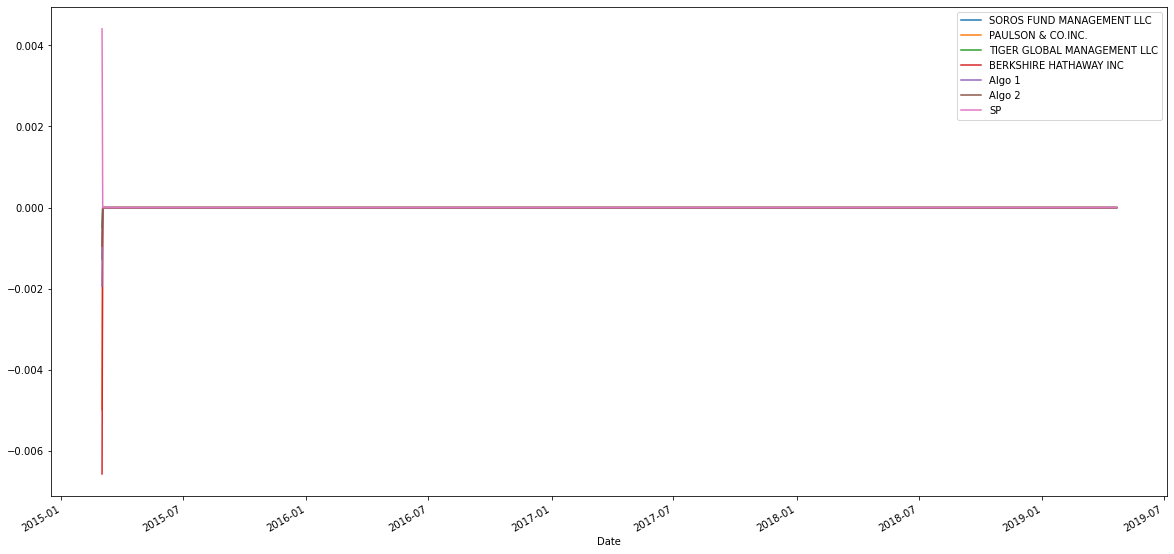

In [17]:
# Calculate cumulative returns of all portfolios
joined_cumulative = joined_data.cumprod()
# Plot cumulative returns
joined_cumulative.plot(figsize=(20, 10))

In [18]:
joined_cumulative

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP
Date,,,,,,,
2015-03-03,-1.265508e-03,-4.980519e-03,-4.955323e-04,-6.568670e-03,-1.942125e-03,-9.494828e-04,4.407847e-03
2015-03-04,-2.821971e-06,-1.614326e-05,1.255667e-06,-2.767393e-05,1.668053e-05,-2.294151e-06,-5.265819e-06
2015-03-05,-1.133304e-08,-6.580078e-08,2.956666e-09,-1.861440e-07,-1.593072e-08,-9.917980e-09,-7.571048e-08
2015-03-06,8.959174e-11,2.351742e-10,-2.507599e-11,2.438125e-09,7.896446e-11,1.136632e-10,2.974636e-10
2015-03-09,5.216744e-14,9.937074e-13,-1.465124e-13,-4.028893e-12,-4.301235e-13,1.481283e-13,5.132446e-12
...,...,...,...,...,...,...,...
2019-04-15,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
2019-04-16,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
2019-04-17,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

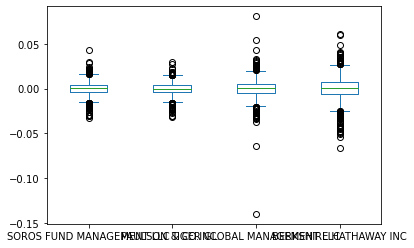

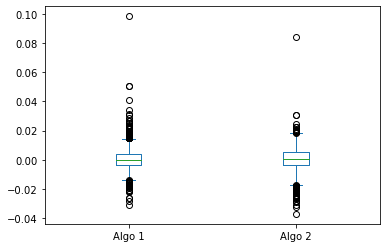

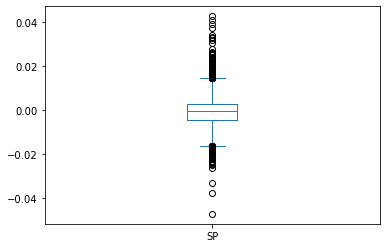

In [19]:
# Box plot to visually show risk
whale_data.plot.box()
algo_data.plot.box()
sp500_Daily_Return.plot.box()


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios

std_joined = joined_data.std()



### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
#sp500_Daily_Return.std()
# Determine which portfolios are riskier than the S&P 500
std_joined = std_joined.sort_values(ascending=False)
std_joined.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP                             0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std_joined * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP                             0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

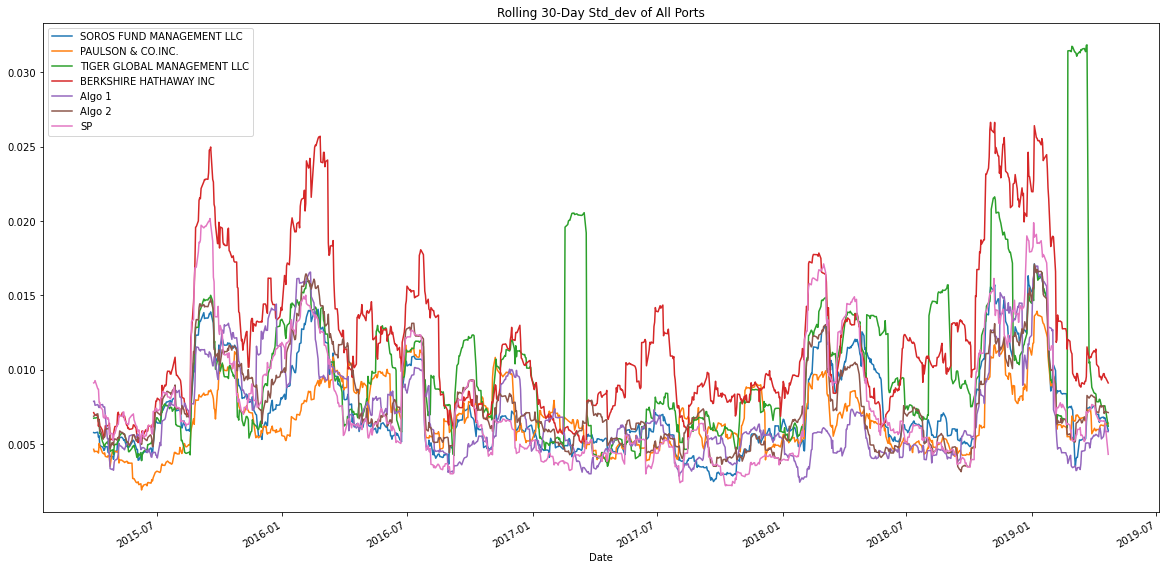

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and plot
rolling_std = joined_data.rolling(window=21).std().plot(figsize=(20, 10), title='Rolling 30-Day Std_dev of All Ports')



### Calculate and plot the correlation

<AxesSubplot:>

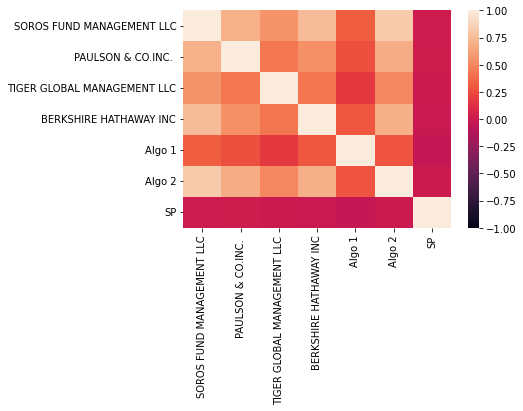

In [24]:
# Calculate the correlation
correlation = joined_data.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

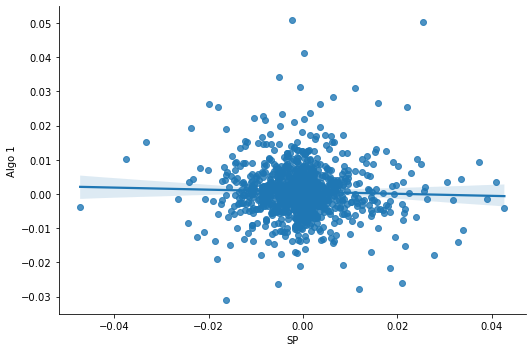

In [25]:
# Calculate covariance of a single portfolio
covariance = joined_data['Algo 1'].cov(joined_data['SP'])
# Calculate variance of S&P 500
variance = joined_data['SP'].var()
# Computing beta
algo1_beta = covariance / variance
# Plot beta trend
sns.lmplot(x='SP', y='Algo 1', data=joined_data, aspect=1.5, fit_reg=True)
#rolling_covariance = joined_data['Algo 1'].rolling(window=30).cov(joined_data['SP'])
#rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_data.mean()-joined_data['SP'].mean()) * 252) / (joined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
SP                             0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

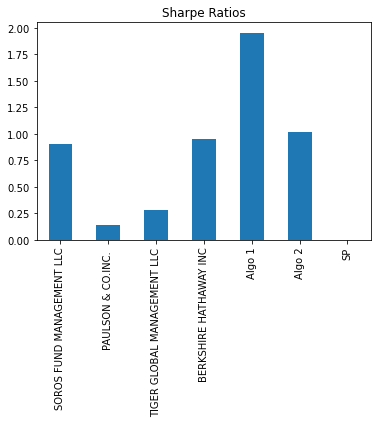

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---Both outperform the market and whale portfolios. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
aapl_data_path = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl_data = pd.read_csv(aapl_data_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [30]:
# Reading data from 2nd stock
cost_data_path = Path('../Starter_Code/Resources/cost_historical.csv')
cost_data = pd.read_csv(cost_data_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [31]:
# Reading data from 3rd stock
goog_data_path = Path('../Starter_Code/Resources/goog_historical.csv')
goog_data = pd.read_csv(goog_data_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [32]:
# Combine all stocks in a single DataFrame
stock_data = pd.concat([aapl_data, goog_data, cost_data], axis="columns", join="inner")
stock_data.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [33]:
# Reset Date index
stock_data.set_index='Trade DATE'

In [34]:
# Reorganize portfolio data by having a column per symbol
stock_data.columns
columns = ["Symbol", "AAPL", "Symbol", "GOOG", "Symbol", "COST"]
stock_data.columns = columns
stock_data = stock_data.drop(columns=["Symbol"])
stock_data.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [35]:
# Calculate daily returns
stock_data_daily_return = stock_data.pct_change()
# Drop NAs

# Display sample data
stock_data_daily_return.dropna()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = stock_data_daily_return.dot(weights)


# Display sample data
portfolio_returns.head()


Trade DATE
2019-05-09         NaN
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
master_data = pd.concat([portfolio_returns, joined_data], axis="columns", join="inner")

In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
master_data.dropna()


#master_data= master_data.rename(columns={
   # " ": "Cust_port"
#})
master_data.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
daily_std_master = master_data.std()
annualized_std_master = daily_std_master * np.sqrt(252)
annualized_std_master.head()

0                              0.213137
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Std_dev of All Ports'}>

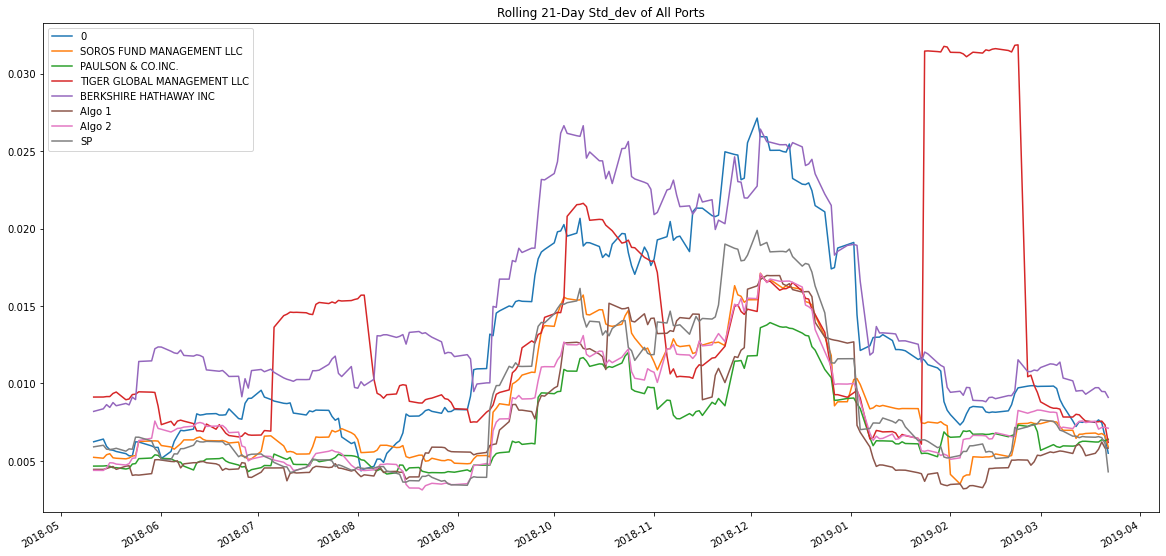

In [40]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
master_data.rolling(window=21).std().plot(figsize=(20, 10), title='Rolling 21-Day Std_dev of All Ports')



### Calculate and plot the correlation

<AxesSubplot:>

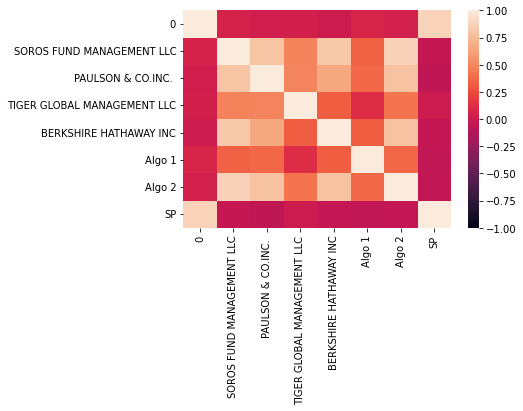

In [41]:
# Calculate and plot the correlation
correlation1 = master_data.corr()
# Display de correlation matrix
sns.heatmap(correlation1, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [42]:
# Calculate and plot Beta
covariance_myport = stock_data_daily_return['AMZN'].cov(stock_data_daily_return['SP'])
covariance
stock_data_daily_return

KeyError: 'AMZN'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

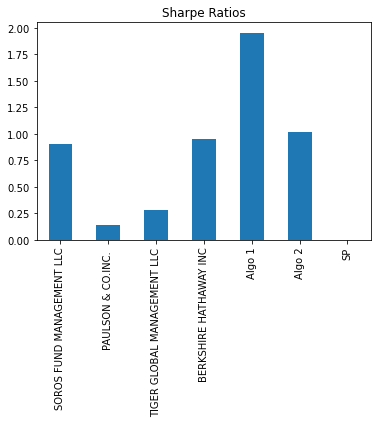

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!